```
uvx harlequin data/Chinook_Sqlite.sqlite 
```

In [2]:
import sqlite3
import pandas as pd

In [3]:
db_path = "Chinook_Sqlite.sqlite"
db = sqlite3.connect(db_path)

cursor = db.cursor()

In [4]:
_q = """SELECT 1"""

cursor.execute(_q)
cursor.fetchall()

[(1,)]

In [5]:
_q = """SELECT name FROM sqlite_master WHERE type='table' and name NOT LIKE 'sqlite_%' ORDER BY name """

cursor.execute(_q)
cursor.fetchall()

[('Album',),
 ('Artist',),
 ('Customer',),
 ('Employee',),
 ('Genre',),
 ('Invoice',),
 ('InvoiceLine',),
 ('MediaType',),
 ('Playlist',),
 ('PlaylistTrack',),
 ('Track',)]

In [6]:
artist_df = pd.read_sql_query("SELECT * FROM Artist",db)
track_df = pd.read_sql_query("SELECT * FROM Track", db)
album_df = pd.read_sql_query("SELECT * FROM Album", db)
genre_df = pd.read_sql_query("SELECT * FROM Genre", db)
artist_df.head(5)
track_df.head(5)


,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [7]:
tracks_df = pd.read_sql_query("SELECT * FROM Track", db)
tracks_df.sample(10)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
3171,3172,The Office: An American Workplace (Pilot),249,3,19,NaN,1380833,290482361,1.99
1438,1439,Emergency On Planet Earth,116,1,1,"Smith, Toby",245263,8117218,0.99
2263,2264,Now I'm Here,185,1,1,"May, Brian",255346,8328312,0.99
305,306,Realidade Virtual,27,1,8,Bino/Da Gamma/Lazao/Toni Garrido,240300,8069934,0.99
1001,1002,Another Round,80,1,1,"Dave Grohl, Taylor Hawkins, Nate Mendel, Chris...",265848,8752670,0.99
1780,1781,Seek And You Shall Find,146,1,14,"Ivy Hunter/William ""Mickey"" Stevenson",223451,7306719,0.99
1365,1366,Iron Maiden,109,1,1,Steve Harris,351869,14076032,0.99
1823,1824,Killing Time,149,1,3,Sweet Savage,183693,6021197,0.99
1950,1951,Bite The Bullet,160,1,3,Clarke/Kilmister/Taylor,98115,3195536,0.99
3166,3167,Five Years Gone,228,3,21,NaN,2587712,530551890,1.99


In [8]:
album_df = pd.read_sql_query("SELECT * FROM Album", db)
album_df.sample(10)

,AlbumId,Title,ArtistId
146,147,The Best Of Men At Work,105
290,291,Puccini: Madama Butterfly - Highlights,225
33,34,Chill: Brazil (Disc 2),6
162,163,From The Muddy Banks Of The Wishkah [Live],110
208,209,Live [Disc 1],137
117,118,The Return Of The Space Cowboy,92
98,99,Fear Of The Dark,90
182,183,Dark Side Of The Moon,120
274,275,Vivaldi: The Four Seasons,209
318,319,Armada: Music from the Courts of England and S...,251


In [9]:
filter = [lambda x: x*y for y in range(len(album_df) + 1) if y < 11]
album_df[album_df.AlbumId == 211]
filter[0](1)

347

In [10]:
album_df.AlbumId == 223

0      False
1      False
2      False
3      False
4      False
       ...  
342    False
343    False
344    False
345    False
346    False
Name: AlbumId, Length: 347, dtype: bool

In [11]:
artist_df[artist_df.ArtistId == 145]

,ArtistId,Name
144,145,Tim Maia


In [12]:
tracks_df.shape, album_df.shape

((3503, 9), (347, 3))

In [13]:
# tracks_df = pd.read_sql_query("SELECT TrackId, Name, AlbumId FROM Track", db)
# tracks_df.sample(10)

_q = """
SELECT 
    TrackId, 
    Name, 
    AlbumId
FROM Track 
LIMIT 5
"""

pd.read_sql_query(_q, db)

,TrackId,Name,AlbumId
0,1,For Those About To Rock (We Salute You),1
1,2,Balls to the Wall,2
2,3,Fast As a Shark,3
3,4,Restless and Wild,3
4,5,Princess of the Dawn,3


In [14]:
_q = """
SELECT 
    *
FROM Album 
LIMIT 5
"""

pd.read_sql_query(_q, db)

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


In [15]:
_q = """
SELECT 
    t.TrackId, 
    t.Name, 
    t.AlbumId,
    a.*
FROM Track as t
JOIN Album as a
ON t.AlbumId = a.AlbumId 
"""
pd.read_sql_query(_q, db)

,TrackId,Name,AlbumId,AlbumId,Title,ArtistId
0,1,For Those About To Rock (We Salute You),1,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2,2,Balls to the Wall,2
2,3,Fast As a Shark,3,3,Restless and Wild,2
3,4,Restless and Wild,3,3,Restless and Wild,2
4,5,Princess of the Dawn,3,3,Restless and Wild,2
...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,343,Respighi:Pines of Rome,226
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,344,Schubert: The Late String Quartets & String Qu...,272
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,345,Monteverdi: L'Orfeo,273
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,346,Mozart: Chamber Music,274


In [16]:
_q = """
SELECT 
    t.TrackId, 
    t.Name as track_name, 
    t.UnitPrice,
    a.AlbumId,
    a.Title as album_title,
    ar.ArtistId,
    ar.Name as artist_name

FROM Track as t
JOIN Album as a
ON t.AlbumId = a.AlbumId 
JOIN Artist as ar
ON a.ArtistId = ar.ArtistId

WHERE t.UnitPrice > 1
"""
pd.read_sql_query(_q, db)

,TrackId,track_name,UnitPrice,AlbumId,album_title,ArtistId,artist_name
0,2819,Battlestar Galactica: The Story So Far,1.99,226,Battlestar Galactica: The Story So Far,147,Battlestar Galactica
1,2820,Occupation / Precipice,1.99,227,"Battlestar Galactica, Season 3",147,Battlestar Galactica
2,2821,"Exodus, Pt. 1",1.99,227,"Battlestar Galactica, Season 3",147,Battlestar Galactica
3,2822,"Exodus, Pt. 2",1.99,227,"Battlestar Galactica, Season 3",147,Battlestar Galactica
4,2823,Collaborators,1.99,227,"Battlestar Galactica, Season 3",147,Battlestar Galactica
...,...,...,...,...,...,...,...
208,3362,"There's No Place Like Home, Pt. 1",1.99,261,"LOST, Season 4",149,Lost
209,3363,"There's No Place Like Home, Pt. 2",1.99,261,"LOST, Season 4",149,Lost
210,3364,"There's No Place Like Home, Pt. 3",1.99,261,"LOST, Season 4",149,Lost
211,3428,Branch Closing,1.99,251,"The Office, Season 3",156,The Office


SQL - Declarative Lang
Python - Imperative Lang

1. CTE

In [17]:
_q = """
WITH newTable AS (
    SELECT 
        t.TrackId, 
        t.Name as track_name, 
        t.UnitPrice,
        a.AlbumId,
        a.Title as album_title
    FROM Track as t
    JOIN Album as a
        ON t.AlbumId = a.AlbumId 
    WHERE t.UnitPrice > 1
)


SELECT 
    album_title, 
    SUM(UnitPrice) as total_price 
FROM newTable
GROUP BY album_title
ORDER BY total_price DESC
"""
pd.read_sql_query(_q, db)

,album_title,total_price
0,"Lost, Season 3",51.74
1,"The Office, Season 3",49.75
2,"Lost, Season 1",49.75
3,"Lost, Season 2",47.76
4,"Battlestar Galactica (Classic), Season 1",47.76
5,"Heroes, Season 1",45.77
6,"The Office, Season 2",43.78
7,"Battlestar Galactica, Season 3",37.81
8,"LOST, Season 4",33.83
9,"The Office, Season 1",11.94


# Questions

1. Number of Tracks are longer than 1 Million Millisecond 
2. For Each Genre, how many tracks are there
3. Which Artist has the highest number of tracks and how many do they have
4. Which Track sold the most and how many copies, what the total revenue from sale of that track (sql+pandas)
5. which Album in total is the biggest in Size ( Track - Bytes)
6. Explore MediaType 
7. Number of employees and Number of customers
8. which customer got the most number of tracks, what tracks did they get. 

In [18]:
#1. Number of Tracks that are longer than 1 million milliseconds

df_track = pd.read_sql_query("SELECT * FROM Track", db)
df_track.sample(4)
query = '''
SELECT Milliseconds, Name
    FROM Track
    WHERE Milliseconds > 1000000
'''

cursor.execute(query)
##cursor.fetchall()

miliseconds_mil = pd.DataFrame(cursor.fetchall(), columns=["Milliseconds", "Name"])
miliseconds_mil

,Milliseconds,Name
0,1196094,Space Truckin'
1,1116734,Dazed And Confused
2,1612329,Dazed And Confused
3,1070027,We've Got To Get Together/Jingo
4,2622250,Battlestar Galactica: The Story So Far
...,...,...
210,2609526,"There's No Place Like Home, Pt. 1"
211,2497956,"There's No Place Like Home, Pt. 2"
212,2582957,"There's No Place Like Home, Pt. 3"
213,1814855,Branch Closing


(('TrackId', None, None, None, None, None, None), ('Name', None, None, None, None, None, None), ('AlbumId', None, None, None, None, None, None), ('MediaTypeId', None, None, None, None, None, None), ('GenreId', None, None, None, None, None, None), ('Composer', None, None, None, None, None, None), ('Milliseconds', None, None, None, None, None, None), ('Bytes', None, None, None, None, None, None), ('UnitPrice', None, None, None, None, None, None), ('GenreId', None, None, None, None, None, None), ('Name', None, None, None, None, None, None))
['TrackId', 'Name', 'AlbumId', 'MediaTypeId', 'GenreId', 'Composer', 'Milliseconds', 'Bytes', 'UnitPrice', 'GenreId', 'Name']


<Axes: xlabel='genre'>

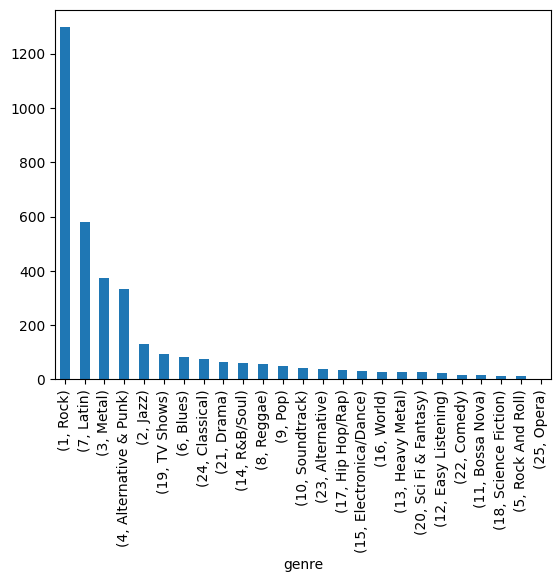

In [65]:
#2. For each Genre, how many Tracks are there?
import matplotlib.pyplot as plt
cursor.execute('''
SELECT *
    FROM Track t
    JOIN Genre g
    ON t.GenreId = g.GenreId
    
''')

#df_genre = pd.read_sql_query("SELECT * FROM Genre", db)
columns = []
print(cursor.description)
for r in cursor.description:
    columns.append(r[0])
print(columns)
cursor.fetchall()

query = '''
SELECT t.GenreId as t_gid, g.GenreId as gid, t.Name as tname, g.Name as genre
    FROM Track t
    JOIN Genre g
    ON t.GenreId = g.GenreId
    WHERE g.GenreId IS NOT NULL
    
'''
df_temp = pd.read_sql_query(query, db)
 # shape is (3503,11)

tracks_per_g = df_temp.groupby(['gid','genre'])['t_gid'].count().sort_values(ascending=False)
tracks_per_g.plot(kind="bar", xlabel='genre')




In [ ]:
# Which Artist has the highest number of tracks, and how many do they have?
import numpy as np
q = '''
SELECT * 
FROM Track

'''

cursor.execute(q)
artist_cols = [y for x in cursor.description for y in x if y != None]
cursor.fetchall()

query = '''
    SELECT a.Name, Composer
    FROM Artist a
    INNER JOIN Track t
    ON a.Name = t.Composer
    
    
    
'''

cursor.execute(query)
print(cursor.description)
cursor.fetchall()



(('Name', None, None, None, None, None, None), ('Composer', None, None, None, None, None, None), ('COUNT(*)', None, None, None, None, None, None))


[('AC/DC', 'AC/DC', 402)]

In [ ]:
ar